# Practice1. KNN

In [18]:
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import _pickle as pickle
import time

# set default plot options
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Data preprocessing

In [19]:
from utils import get_CIFAR10_data

In [20]:
X_tr, Y_tr, X_te, Y_te, mean_img = get_CIFAR10_data()
print ('Train data shape : %s,  Train labels shape : %s' % (X_tr.shape, Y_tr.shape))
print ('Test data shape : %s,  Test labels shape : %s' % (X_te.shape, Y_te.shape))

Train data shape : (10000, 3072),  Train labels shape : (10000,)
Test data shape : (1000, 3072),  Test labels shape : (1000,)


## Training image 시각화

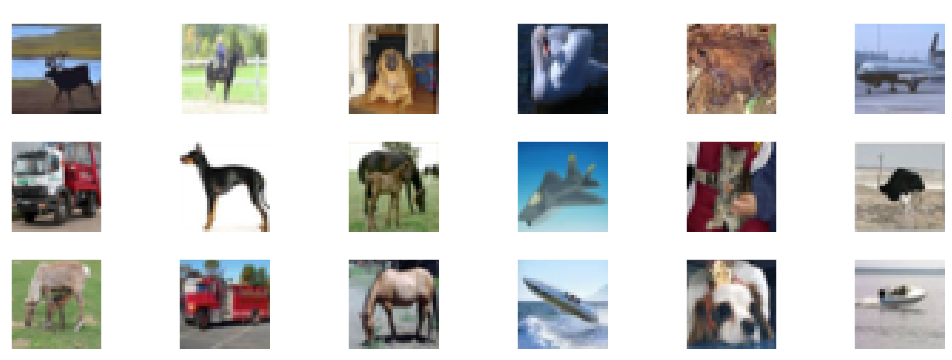

In [21]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

images_index = np.int32(np.round(np.random.rand(18,)*10000,0))

fig, axes = plt.subplots(3, 6, figsize=(18, 6),
                         subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.3, wspace=0.05)

for ax, idx in zip(axes.flat, images_index):
    img = (X_tr[idx,:3072].reshape(32, 32, 3) + mean_img.reshape(32, 32, 3))
    ax.imshow(img)
    ax.set_title(class_names[Y_tr[idx]])
    

# 1. Euclidean Distance

In [35]:
def getEuclideanDist(X_tr, X_te_instance):
    """
    getEuclideanDist 함수를 생성하라.
    하나의 X_te_instace와, Training dataset(X_tr) 간의 euclidean distance를 구하는 함수
    
    Inputs : 
        - X_tr : (N, D) 차원의 벡터(전체 Training data)
        - X_te_instance : (1, D) 차원의 벡터 (하나의 Test data)
    
    Output : 
        - dist_arr : N개의 distance
    
    Hint :
        - Numpy의 linalg.norm() 함수를 참고하여 사용하시오.
        
    """
    
    dist_arr = []
    length = X_tr.shape[0]
    
    #########################################################################################################
    #------------------------------------------WRITE YOUR CODE----------------------------------------------#
    
    
    dist_arr = np.linalg.norm(X_tr - X_te_instance,axis=1)
    #-----------------------------------------END OF YOUR CODE----------------------------------------------#
    #########################################################################################################
    
    return dist_arr

In [36]:
temp_X_tr = np.array([[1,2,3]])
temp_X_te_instance = np.array([3,2,1])

print (temp_X_tr.shape)
print (temp_X_te_instance.shape)

(1, 3)
(3,)


In [37]:
print (getEuclideanDist(temp_X_tr, temp_X_te_instance))

[2.82842712]


반드시 [2.8284271247461903] 와 유사한 값을 얻어야 함.

In [38]:
temp_X_tr = np.array([[1,2,3],[4,5,6],[7,8,9]])
temp_X_te_instance = np.array([10,9,8])

print (temp_X_tr.shape)
print (temp_X_te_instance.shape)

(3, 3)
(3,)


In [39]:
print (getEuclideanDist(temp_X_tr, temp_X_te_instance))

[12.4498996   7.48331477  3.31662479]


반드시 [12.449899597988733, 7.483314773547883, 3.3166247903554] 와 유사한 값을 얻어야 함.

# 2. K-nearest neighbor

In [40]:
def getKNN(distances, Y_tr, k):
    """
    getKNN 함수를 생성하라.
    N개의 distance 중에서 가장 가까운 k개의 Y_tr(Training data의 Label)을 구하는 함수.
    
    Inputs : 
        - distances : N개의 distance
        - Y_tr : (N, 1) 차원의 벡터 (전체 Training data의 Label)
        - k : KNN에서 사용할 k값
    
    Output : 
        - neighbor : 가장 가까운 k개의 Training data의 Label
        
    Hint :
        - Numpy의 argpartition(), take() 함수를 참고하여 사용하시오.
        
    """
    
    neighbors = None
    
    #########################################################################################################
    #------------------------------------------WRITE YOUR CODE----------------------------------------------#
    neighbors = Y_tr.take(np.argpartition(distances,k))[:k]
    #-----------------------------------------END OF YOUR CODE----------------------------------------------#
    #########################################################################################################
    
    return neighbors

In [41]:
temp_X_tr = np.array([[1,2,3],[3,4,5],[5,6,7],[8,9,10],[10,8,9],[11,12,13],[13,14,15]])
temp_X_te_instance = np.array([10,9,8])

print (temp_X_tr.shape)
print (temp_X_te_instance.shape)

(7, 3)
(3,)


In [42]:
distances = getEuclideanDist(temp_X_tr, temp_X_te_instance)
print (distances)

[12.4498996   9.11043358  5.91607978  2.82842712  1.41421356  5.91607978
  9.11043358]


In [43]:
temp_Y_tr = np.array([1,2,3,4,4,5,6])
k = 3
print (getKNN(distances, temp_Y_tr, k))

[4 4 3]


반드시 [4 4 3] 와 같은 값을 얻어야 함.

# 3. getPredictedLabel

In [48]:
def getPredictedLabel(neighbors):
    """
    getPredictedLabel 함수를 생성하라.
    k개의 가장 가까운 training data의 label을 이용하여 Predicted label을 반환하는 함수.
    k개의 neighbors들 중에 가장 많은 값을 predicted label로 선택하라.
    
    Inputs : 
        - neighbors : 가장 가까운 k개의 Training data의 Label
    
    Output : 
        - predicted_label : neighbor를 이용하여 결정된 1개의 predicted label
    
    Hint : 
        - Numpy의 bincount() 함수를 참고하여 사용하시오.
        
    """
    
    predicted_label = None
    
    #########################################################################################################
    #------------------------------------------WRITE YOUR CODE----------------------------------------------#
    predicted_label= np.argmax(np.bincount(neighbors))
    #-----------------------------------------END OF YOUR CODE----------------------------------------------#
    #########################################################################################################
    
    return predicted_label

In [49]:
temp_X_tr = np.array([[1,2,3],[3,4,5],[5,6,7],[8,9,10],[10,8,9],[11,12,13],[13,14,15]])
temp_X_te_instance = np.array([10,9,8])

print (temp_X_tr.shape)
print (temp_X_te_instance.shape)

(7, 3)
(3,)


In [50]:
distances = getEuclideanDist(temp_X_tr, temp_X_te_instance)
temp_Y_tr = np.array([1,2,3,4,4,5,6])
k = 3
neighbors = getKNN(distances, temp_Y_tr, k)
predicted_label = getPredictedLabel(neighbors)

[4 4 3]


In [51]:
print (predicted_label)

4


반드시 4 와 같은 값을 얻어야 함.

# 4. getKNNAccuracy

In [72]:
def getKNNAccuray(k,X_tr,Y_tr,X_te,Y_te):
    """
    getKNNAccuray 함수를 생성하라.
    training data들을 이용하여 각각의 test data의 KNN을 이용한 accuracy를 구하는 함수.
    위 과정에서 사용한 getEuclideanDist(), getKNN(), getPredictedLabel() 함수를 사용하여 구현하라.
    for문을 이용하여 각각의 test data에 순차적으로 접근하여 predicted label을 구하라.
    
    Inputs : 
        - k : KNN에서 사용할 k값
        - X_tr : training dataset의 input data
        - Y_tr : training dataset의 label data
        - X_te : test dataset의 input data
        - Y_te : test dataset의 label data
        
    Output : 
        - accuracy : KNN을 이용했을 때 전체 test dataset의 accuracy
        
    """
    
    predicted_label_arr = []

    length = X_te.shape[0]
    #########################################################################################################
    #------------------------------------------WRITE YOUR CODE----------------------------------------------#
    for i in X_te:
        predicted_label_arr.append(getPredictedLabel(getKNN(getEuclideanDist(X_tr, i), Y_tr, k)))
    
    
    accuracy = sum(Y_te == predicted_label_arr) / length
    

    #-----------------------------------------END OF YOUR CODE----------------------------------------------#
    #########################################################################################################
    
    return accuracy

In [73]:
print (getKNNAccuray(20, X_tr, Y_tr, X_te, Y_te))

]
[0 0 2 0 1 0 5 0 8 2 1 4 8 0 8 0 0 0 0 0]
[4 3 5 8 5 2 4 4 5 4 5 4 2 5 6 2 6 2 4 2]
[6 0 5 2 0 7 4 2 2 2 6 2 0 0 3 2 5 0 2 0]
[8 0 3 2 0 0 8 0 0 0 2 0 2 2 8 2 0 0 8 2]
[8 2 0 0 8 0 8 2 2 8 0 0 2 0 0 0 0 0 0 8]
[3 4 6 4 6 3 6 6 4 6 4 4 6 6 2 3 6 2 6 6]
[9 8 8 9 0 2 1 9 1 8 9 9 0 8 0 0 0 9 1 1]
[0 5 8 7 3 9 8 2 8 4 9 0 9 9 8 1 7 1 3 4]
[4 2 4 2 3 4 4 6 7 2 6 2 4 2 6 6 2 2 2 4]
[3 8 2 8 0 8 8 8 5 2 8 3 0 0 2 0 0 0 2 0]
[6 6 6 6 6 4 6 7 3 4 4 6 6 2 2 6 2 2 6 4]
[4 2 2 2 2 2 2 2 2 2 2 2 2 7 6 2 2 7 4 6]
[4 4 6 2 2 6 6 7 4 4 2 3 6 4 4 4 6 2 4 7]
[4 6 6 4 4 4 4 4 4 4 2 2 4 6 2 4 2 2 2 5]
[0 8 1 0 9 0 7 1 0 9 4 8 0 8 8 9 9 9 9 7]
[8 2 2 3 8 7 4 2 7 2 0 5 2 5 0 0 8 2 8 8]
[0 8 8 8 8 8 4 8 0 1 0 8 3 3 8 2 8 8 4 0]
[2 2 2 2 8 5 0 9 4 8 7 8 4 7 0 4 8 8 2 7]
[6 5 6 2 3 6 6 4 4 3 2 6 6 6 6 0 3 2 2 4]
[2 4 8 4 4 9 6 6 6 2 6 2 4 6 2 2 4 2 7 2]
[5 5 5 3 4 6 5 2 2 4 6 4 5 2 4 4 5 2 2 6]
[5 9 0 9 2 0 9 0 9 0 8 8 0 4 1 8 9 0 4 2]
[1 8 8 1 1 1 1 1 8 1 8 8 8 8 1 8 2 8 0 8]
[5 2 7 2 2 2 6 4 2 6 2 2 3 3 4 6

반드시 0.297 와 같은 값을 얻어야 함.

# 5. 다양한 K에 대해 결과그래프 그리기

#### 다양한 k에 대한 KNN의 결과를 얻고 이에대한 Graph를 그려서 k값에 따른 Accuracy의 변화를 확인하기
#### 모든 결과를 얻는데 다소 시간이 걸릴 수 있습니다. (10~20분)

In [60]:
accuracy_k_arr = []
k_arr = [1,3,5,7,9,11,13,25,50,100]

for k in (k_arr):
    accuracy_k_arr.append(getKNNAccuray(k, X_tr, Y_tr, X_te, Y_te))

In [61]:
print (accuracy_k_arr)

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,8])
plt.plot(accuracy_k_arr,linewidth=2)
plt.xticks(np.arange(10),k_arr)
plt.ylabel('KNN Accuracy',fontsize=15)
plt.xlabel('k',fontsize=15)
plt.ylim([0.25,0.3])
plt.show()